In [4]:
import warnings

warnings.filterwarnings("ignore")

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

# step 1: data specification
y = load_airline()
# step 2: specifying forecasting horizon
fh = [1, 2, 3]
# step 3: specifying the forecasting algorithm
forecaster = ThetaForecaster()
# step 4: fitting the forecaster
forecaster.fit(y, fh=[1, 2, 3])
# step 5: querying predictions
y_pred = forecaster.predict()

# for probabilistic forecasting:
#   call a probabilistic forecasting method after or instead of step 5
y_pred_int = forecaster.predict_interval(coverage=0.9)
y_pred_int

from sktime.registry import all_estimators

all_estimators(
    "forecaster", filter_tags={"capability:pred_int": True}, as_dataframe=True
)

,name,object
0,ARCH,<class 'sktime.forecasting.arch._uarch.ARCH'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,BATS,<class 'sktime.forecasting.bats.BATS'>
5,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
6,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
7,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
8,DynamicFactor,<class 'sktime.forecasting.dynamic_factor.Dyna...
9,FhPlexForecaster,<class 'sktime.forecasting.compose._fhplex.FhP...


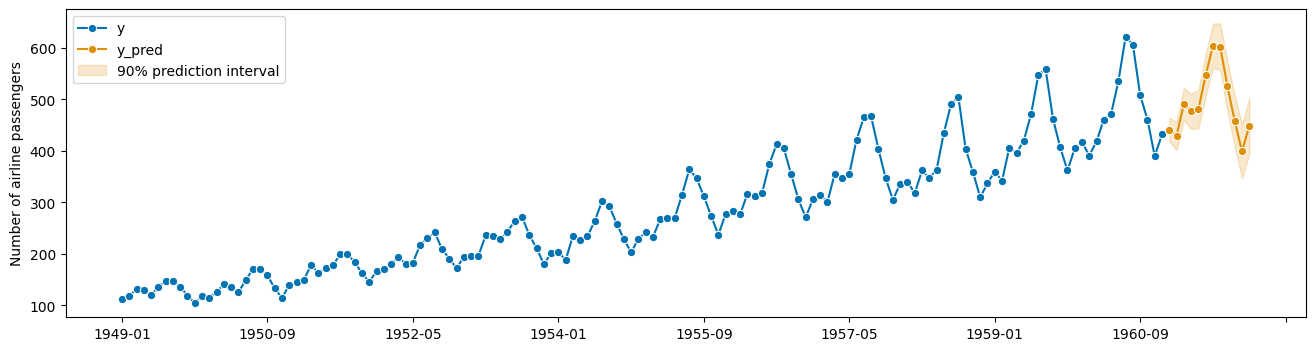

In [5]:
import numpy as np

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

# until fit, identical with the simple workflow
y = load_airline()

fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y, fh=fh)



coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

from sktime.utils import plotting

# also requires predictions
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(
    y, y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints
)

ax.legend();

In [8]:
coverage = [0.5, 0.9, 0.95]
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Number of airline passengers                                      \
                                0.50                    0.90               
                               lower       upper       lower       upper   
1961-01                   431.849267  450.712807  418.280122  464.281951   
1961-02                   418.342515  440.761422  402.215882  456.888054   
1961-03                   478.296824  503.779790  459.966115  522.110499   
1961-04                   462.886145  491.102379  442.589311  511.399213   
1961-05                   465.613671  496.320837  443.525030  518.409479   
1961-06                   530.331442  563.342111  506.585817  587.087735   
1961-07                   586.791065  621.954661  561.496772  647.248954   
1961-08                   584.116791  621.308896  557.363326  648.062361   
1961-09                   505.795125  544.910684  477.658059  573.047750   
1961-10                   437.370842  478.319604  407.915094  507.775352   
1961-11                   377.660800  420.364141  346.942927  451.082014   
1961-12                   426.638372  471.026992  394.708225  502.957139   

                                 
               0.95              
              lower       upper  
1961-01  413.873757  468.688317  
1961-02  396.979013  462.124924  
1961-03  454.013506  528.063107  
1961-04  435.998234  517.990290  
1961-05  436.352092  525.582416  
1961-06  498.874801  594.798752  
1961-07  553.282849  655.462877  
1961-08  548.675560  656.750127  
1961-09  468.520991  582.184818  
1961-10  398.349805  517.340642  
1961-11  336.967783  461.057158  
1961-12  384.339413  513.325950

In [9]:
alpha = [0.1, 0.25, 0.5, 0.75, 0.9]
y_pred_quantiles = forecaster.predict_quantiles(alpha=alpha)
y_pred_quantiles

Number of airline passengers                                      \
                                0.10        0.25        0.50        0.75   
1961-01                   423.360380  431.849267  441.281037  450.712807   
1961-02                   408.253658  418.342515  429.551968  440.761422   
1961-03                   466.829091  478.296824  491.038307  503.779790   
1961-04                   450.188400  462.886145  476.994262  491.102379   
1961-05                   451.794968  465.613671  480.967254  496.320837   
1961-06                   515.476126  530.331442  546.836776  563.342111   
1961-07                   570.966898  586.791065  604.372863  621.954661   
1961-08                   567.379763  584.116791  602.712844  621.308896   
1961-09                   488.192514  505.795125  525.352905  544.910684   
1961-10                   418.943260  437.370842  457.845223  478.319604   
1961-11                   358.443630  377.660800  399.012471  420.364141   
1961-12                   406.662800  426.638372  448.832682  471.026992   

                     
               0.90  
1961-01  459.201694  
1961-02  450.850279  
1961-03  515.247523  
1961-04  503.800124  
1961-05  510.139541  
1961-06  578.197427  
1961-07  637.778828  
1961-08  638.045924  
1961-09  562.513295  
1961-10  496.747186  
1961-11  439.581311  
1961-12  491.002563

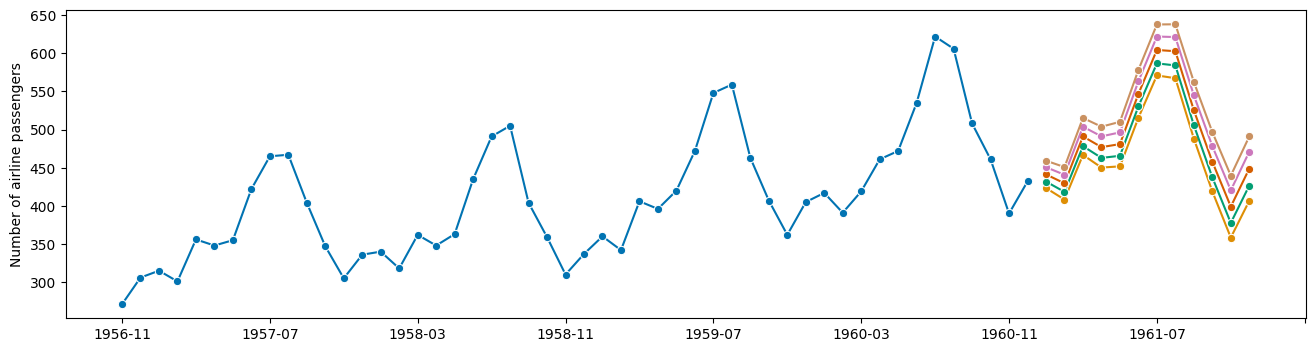

In [10]:
from sktime.utils import plotting

columns = [y_pred_quantiles[i] for i in y_pred_quantiles.columns]
fig, ax = plotting.plot_series(y[-50:], *columns)

In [11]:
y_pred_variance = forecaster.predict_var()
y_pred_variance

,Number of airline passengers
1961-01,195.540037
1961-02,276.196485
1961-03,356.852933
1961-04,437.509382
1961-05,518.165830
1961-06,598.822278
1961-07,679.478726
1961-08,760.135174
1961-09,840.791622
1961-10,921.448070


In [12]:
from sktime.forecasting.naive import NaiveVariance

forecaster_with_covariance = NaiveVariance(forecaster)
forecaster_with_covariance.fit(y=y, fh=fh)
forecaster_with_covariance.predict_var(cov=True)

,1961-01,1961-02,1961-03,1961-04,1961-05,1961-06,1961-07,1961-08,1961-09,1961-10,1961-11,1961-12
1961-01,292.337349,255.743013,264.805460,227.703074,146.093871,154.452851,157.976809,105.160772,78.330272,81.835809,78.048895,197.364526
1961-02,255.743013,422.704630,402.539285,353.437076,291.205437,236.587906,227.199396,205.653022,152.067441,121.629146,156.199133,245.437929
1961-03,264.805460,402.539285,588.085358,506.095488,426.997545,394.503956,311.457861,282.072159,243.688617,185.938849,185.070384,305.461235
1961-04,227.703074,353.437076,506.095488,634.350479,526.180916,482.653130,422.777331,323.453760,280.749336,242.065803,211.397193,294.971060
1961-05,146.093871,291.205437,426.997545,526.180916,628.659383,570.277558,499.460213,419.166463,325.582800,281.608619,269.847470,318.534704
1961-06,154.452851,236.587906,394.503956,482.653130,570.277558,728.132534,629.184867,527.767051,444.690541,330.643669,313.248457,382.803244
1961-07,157.976809,227.199396,311.457861,422.777331,499.460213,629.184867,753.550020,629.138731,536.407578,441.998607,352.570986,415.110934
1961-08,105.160772,205.653022,282.072159,323.453760,419.166463,527.767051,629.138731,729.423298,615.142488,506.155603,439.994847,430.992300
1961-09,78.330272,152.067441,243.688617,280.749336,325.582800,444.690541,536.407578,615.142488,744.225559,609.227127,527.489584,546.637596
1961-10,81.835809,121.629146,185.938849,242.065803,281.608619,330.643669,441.998607,506.155603,609.227127,697.805457,590.542045,604.681133


In [13]:
y_pred_dist = forecaster.predict_proba()
y_pred_dist

Normal(columns=Index(['Number of airline passengers'], dtype='object'),
       index=PeriodIndex(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12'],
            dtype='period[M]'),
       mu=         Number of airline passengers
1961-01                    441.281037
1961-02                    429.551968
1961-03                    491.038307
1961-04                    476.994262
1961-05                    480.967254
1961-06                    546.836776
1961-07                    604.372863
1961-08                    602.712844
1961-09                    525.352905
1961-10                    457.845223
1961-11                    399.012471
1961-12                    448.832682,
       sigma=         Number of airline passengers
1961-01                     13.983563
1961-02                     16.619160
1961-03                     18.890551
1961-04                     20.916725
1961-05                     22.763256
1961-06                     24.470845
1961-07                     26.066813
1961-08                     27.570549
1961-09                     28.996407
1961-10                     30.355363
1961-11                     31.656034
1961-12                     32.905333)

In [14]:
y_pred_dist.quantile([0.1, 0.9])

Number of airline passengers            
                                 0.1         0.9
1961-01                   423.360380  459.201694
1961-02                   408.253658  450.850279
1961-03                   466.829091  515.247523
1961-04                   450.188400  503.800124
1961-05                   451.794968  510.139541
1961-06                   515.476126  578.197427
1961-07                   570.966898  637.778828
1961-08                   567.379763  638.045924
1961-09                   488.192514  562.513295
1961-10                   418.943260  496.747186
1961-11                   358.443630  439.581311
1961-12                   406.662800  491.002563

In [16]:
# 1949 and 1950
y_start = y[:24]
# Jan 1951 etc
y_update_batch_1 = y.loc[["1951-01"]]
y_update_batch_2 = y.loc[["1951-02"]]
y_update_batch_3 = y.loc[["1951-03"]]

# now = Dec 1950

# 1a. fit to data available in Dec 1950
#   fh = [1, 2, ..., 12] for all 12 months ahead
forecaster.fit(y_start, fh=1 + np.arange(12))

# 1b. predict 1951, in Dec 1950
forecaster.predict_interval()
# or other proba predict functions

Number of airline passengers            
                                 0.9            
                               lower       upper
1951-01                   125.708001  141.744258
1951-02                   135.554587  154.422389
1951-03                   149.921349  171.248008
1951-04                   140.807416  164.337372
1951-05                   127.941095  153.485004
1951-06                   152.968276  180.378560
1951-07                   167.193933  196.351370
1951-08                   166.316509  197.122167
1951-09                   150.425513  182.795576
1951-10                   128.623028  162.485299
1951-11                   109.567277  144.858719
1951-12                   125.641286  162.306232

In [17]:
# time passes, now = Jan 1951

# 2a. update forecaster with new data
forecaster.update(y_update_batch_1)

# 2b. make new prediction - year ahead = Feb 1951 to Jan 1952
forecaster.predict_interval()
# forecaster remembers relative forecasting horizon

Number of airline passengers            
                                 0.9            
                               lower       upper
1951-02                   136.659401  152.695658
1951-03                   150.894542  169.762345
1951-04                   141.748827  163.075486
1951-05                   128.876520  152.406476
1951-06                   153.906405  179.450314
1951-07                   168.170068  195.580353
1951-08                   167.339646  196.497083
1951-09                   151.478085  182.283743
1951-10                   129.681611  162.051674
1951-11                   110.621196  144.483467
1951-12                   126.786546  162.077988
1952-01                   121.345114  158.010060

In [18]:
# time passes, now = Feb 1951

# 3a. update forecaster with new data
forecaster.update(y_update_batch_2)

# 3b. make new prediction - year ahead = Feb 1951 to Jan 1952
forecaster.predict_interval()

Number of airline passengers            
                                 0.9            
                               lower       upper
1951-03                   151.754369  167.790626
1951-04                   142.481689  161.349491
1951-05                   129.549186  150.875845
1951-06                   154.439360  177.969316
1951-07                   168.623239  194.167147
1951-08                   167.770038  195.180323
1951-09                   151.929279  181.086716
1951-10                   130.167030  160.972688
1951-11                   111.133097  143.503160
1951-12                   127.264386  161.126657
1952-01                   121.830222  157.121663
1952-02                   132.976430  169.641376

In [19]:
# time passes, now = Feb 1951

# 4a. update forecaster with new data
forecaster.update(y_update_batch_3)

# 4b. make new prediction - year ahead = Feb 1951 to Jan 1952
forecaster.predict_interval()

Number of airline passengers            
                                 0.9            
                               lower       upper
1951-04                   143.421744  159.458001
1951-05                   130.401490  149.269292
1951-06                   155.166804  176.493463
1951-07                   169.300651  192.830607
1951-08                   168.451755  193.995663
1951-09                   152.643332  180.053616
1951-10                   130.913432  160.070868
1951-11                   111.900914  142.706572
1951-12                   128.054398  160.424461
1952-01                   122.645047  156.507318
1952-02                   133.834102  169.125544
1952-03                   149.605271  186.270218

(<Figure size 1600x480 with 1 Axes>,
 <Axes: xlabel='Time', ylabel='Window number'>)

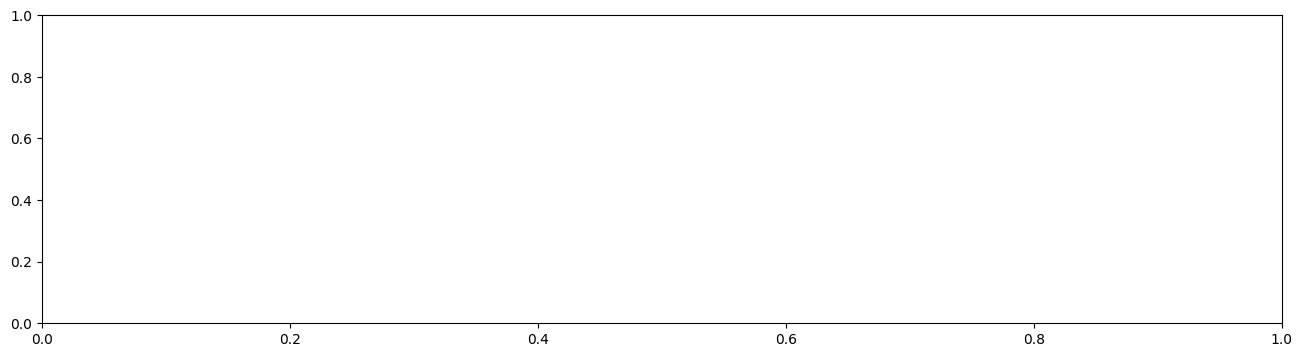

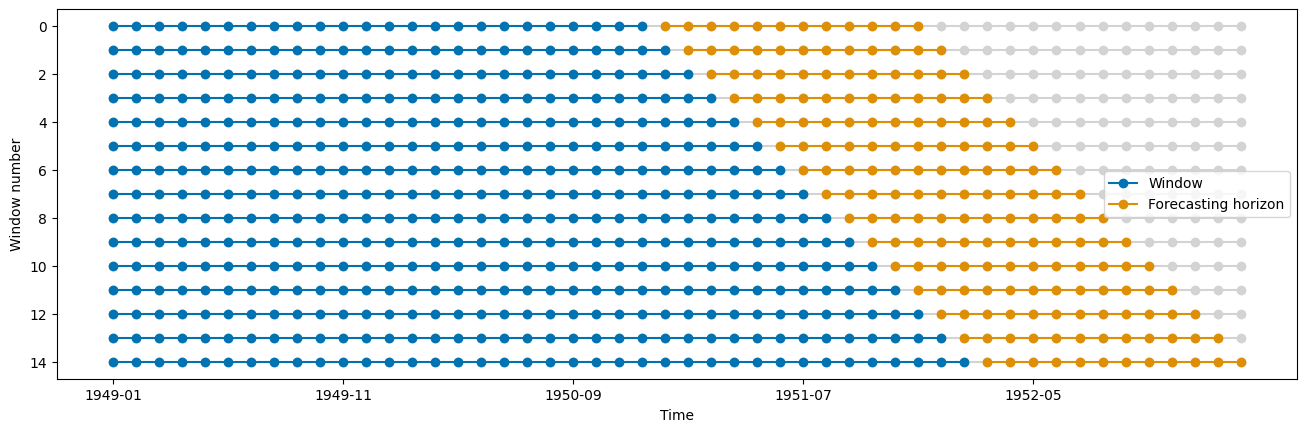

In [20]:
from sktime.split import ExpandingWindowSplitter
from sktime.utils.plotting import plot_windows

cv = ExpandingWindowSplitter(step_length=1, fh=fh, initial_window=24)
plot_windows(cv, y.iloc[:50])

In [22]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

mv_forecaster = VAR()

mv_forecaster.fit(y, fh=[1, 2, 3])


from sktime.forecasting.arima import ARIMA
from sktime.utils._testing.hierarchical import _make_hierarchical

y_hier = _make_hierarchical()
y_hier

c0
h0   h1   time                
h0_0 h1_0 2000-01-01  4.058782
          2000-01-02  3.273876
          2000-01-03  6.603441
          2000-01-04  4.411936
          2000-01-05  3.477519
...                        ...
h0_1 h1_3 2000-01-08  3.616733
          2000-01-09  5.482078
          2000-01-10  4.264370
          2000-01-11  4.785941
          2000-01-12  4.346749

[96 rows x 1 columns]

In [23]:
forecaster = ThetaForecaster()
forecaster.fit(y_hier, fh=[1, 2, 3])
forecaster.predict_interval()

0          
                           0.9          
                         lower     upper
h0   h1   time                          
h0_0 h1_0 2000-01-13  2.788292  6.350460
          2000-01-14  2.802371  6.364539
          2000-01-15  2.816450  6.378618
     h1_1 2000-01-13  2.428381  5.376816
          2000-01-14  2.419538  5.367974
          2000-01-15  2.410696  5.359131
     h1_2 2000-01-13  2.464457  7.336308
          2000-01-14  2.479637  7.351488
          2000-01-15  2.494818  7.366669
     h1_3 2000-01-13  3.510993  7.560873
          2000-01-14  3.583750  7.633630
          2000-01-15  3.656507  7.706387
h0_1 h1_0 2000-01-13  1.604083  5.736951
          2000-01-14  1.602413  5.735281
          2000-01-15  1.600744  5.733611
     h1_1 2000-01-13  2.700831  5.207554
          2000-01-14  2.716521  5.223245
          2000-01-15  2.732212  5.238935
     h1_2 2000-01-13  2.894716  6.299013
          2000-01-14  2.866914  6.271211
          2000-01-15  2.839112  6.243409
     h1_3 2000-01-13  3.531033  5.697077
          2000-01-14  3.551927  5.717971
          2000-01-15  3.572820  5.738865

In [24]:
import numpy as np

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

y_train = load_airline()[0:24]  # train on 24 months, 1949 and 1950
y_test = load_airline()[24:36]  # ground truth for 12 months in 1951

# try to forecast 12 months ahead, from y_train
fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train, fh=fh)

pred_quantiles = forecaster.predict_quantiles(alpha=[0.1, 0.25, 0.5, 0.75, 0.9])
pred_quantiles

Number of airline passengers                                      \
                                0.10        0.25        0.50        0.75   
1951-01                   127.478981  130.438210  133.726129  137.014048   
1951-02                   137.638271  141.120017  144.988488  148.856960   
1951-03                   152.276579  156.212066  160.584678  164.957290   
1951-04                   143.405970  147.748040  152.572394  157.396749   
1951-05                   130.762062  135.475774  140.713050  145.950326   
1951-06                   155.995358  161.053479  166.673418  172.293358   
1951-07                   170.413964  175.794493  181.772652  187.750810   
1951-08                   169.718562  175.403244  181.719338  188.035432   
1951-09                   154.000333  159.973700  166.610544  173.247389   
1951-10                   132.362641  138.611371  145.554164  152.496956   
1951-11                   113.464722  119.977182  127.212998  134.448814   
1951-12                   129.690415  136.456333  143.973759  151.491185   

                     
               0.90  
1951-01  139.973278  
1951-02  152.338705  
1951-03  168.892777  
1951-04  161.738818  
1951-05  150.664037  
1951-06  177.351479  
1951-07  193.131340  
1951-08  193.720114  
1951-09  179.220756  
1951-10  158.745686  
1951-11  140.961274  
1951-12  158.257103

In [25]:
from sktime.performance_metrics.forecasting.probabilistic import PinballLoss

loss = PinballLoss(score_average=False)
loss(y_true=y_test, y_pred=pred_quantiles)

0.10    2.706601
0.25    5.494502
0.50    8.162433
0.75    8.003793
0.90    5.220240
Name: 0, dtype: float64

In [26]:
loss.evaluate_by_index(y_true=y_test, y_pred=pred_quantiles)

,0.10,0.25,0.50,0.75,0.90
0,1.752102,3.640447,5.636935,5.989464,4.524050
1,1.236173,2.219996,2.505756,0.857280,0.233871
2,2.572342,5.446983,8.707661,9.782032,8.196501
3,1.959403,3.812990,5.213803,4.202438,1.135063
4,4.123794,9.131057,15.643475,19.537256,19.202366
5,2.200464,4.236630,5.663291,4.279982,0.583669
6,2.858604,5.801377,8.613674,8.436892,5.281794
7,2.928144,5.899189,8.640331,8.223426,4.751897
8,2.999967,6.006575,8.694728,8.064458,4.301320
9,2.963736,5.847157,8.222918,7.127283,2.928883


In [27]:
from sktime.performance_metrics.forecasting.probabilistic import PinballLoss

loss_multi = PinballLoss(score_average=True)
loss_multi(y_true=y_test, y_pred=pred_quantiles)

5.917513641155971

In [28]:
loss_multi.evaluate_by_index(y_true=y_test, y_pred=pred_quantiles)

0      4.308600
1      1.410615
2      6.941104
3      3.264740
4     13.527590
5      3.392807
6      6.198468
7      6.088597
8      6.013410
9      5.417995
10     6.470195
11     7.976043
dtype: float64

In [29]:
pred_interval = forecaster.predict_interval(coverage=0.8)
pred_interval

Number of airline passengers            
                                 0.8            
                               lower       upper
1951-01                   127.478981  139.973278
1951-02                   137.638271  152.338705
1951-03                   152.276579  168.892777
1951-04                   143.405970  161.738818
1951-05                   130.762062  150.664037
1951-06                   155.995358  177.351479
1951-07                   170.413964  193.131340
1951-08                   169.718562  193.720114
1951-09                   154.000333  179.220756
1951-10                   132.362641  158.745686
1951-11                   113.464722  140.961274
1951-12                   129.690415  158.257103

In [30]:
loss(y_true=y_test, y_pred=pred_interval)

0.1    2.706601
0.9    5.220240
Name: 0, dtype: float64

In [31]:
loss_multi(y_true=y_test, y_pred=pred_interval)

3.9634203912400867

In [32]:
from sktime.datasets import load_airline
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting.probabilistic import PinballLoss
from sktime.split import ExpandingWindowSplitter

# 1. define data
y = load_airline()

# 2. define splitting/backtesting regime
fh = [1, 2, 3]
cv = ExpandingWindowSplitter(step_length=12, fh=fh, initial_window=72)

# 3. define loss to use
loss = PinballLoss()
# default is score_average=True and multi_output="uniform_average", so gives a number

forecaster = ThetaForecaster(sp=12)
results = evaluate(
    forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True, scoring=loss
)
results.iloc[:, :5].head()

,test_PinballLoss,fit_time,pred_quantiles_time,len_train_window,cutoff
0,0.865788,0.007289,0.006659,72,1954-12
1,0.958340,0.005375,0.005303,84,1955-12
2,0.981744,0.005005,0.004674,96,1956-12
3,1.411309,0.004623,0.004622,108,1957-12
4,1.187198,0.004851,0.004893,120,1958-12


In [36]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

my_forecaster = ExponentialSmoothing()

# does the forecaster support probabilistic predictions?
my_forecaster.get_tag("capability:pred_int")

# NaiveVariance adds intervals & variance via collecting past residuals
from sktime.forecasting.naive import NaiveVariance

# create a composite forecaster like this:
my_forecaster_with_proba = NaiveVariance(my_forecaster)

# does it support probabilistic predictions now?
my_forecaster_with_proba.get_tag("capability:pred_int")

y = load_airline()

my_forecaster_with_proba.fit(y, fh=[1, 2, 3])
my_forecaster_with_proba.predict_interval()

Number of airline passengers            
                                 0.9            
                               lower       upper
1961-01                   341.737958  521.845604
1961-02                   319.623515  543.960047
1961-03                   307.131363  556.452199

In [37]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting.probabilistic import PinballLoss
from sktime.split import SlidingWindowSplitter

# forecaster we want to tune
forecaster = ThetaForecaster()

# parameter grid to search over
param_grid = {"sp": [1, 6, 12]}

# evaluation/backtesting regime for *tuning*
fh = [1, 2, 3]  # fh for tuning regime, does not need to be same as in fit/predict!
cv = SlidingWindowSplitter(window_length=36, fh=fh)
scoring = PinballLoss()

# construct the composite forecaster with grid search compositor
gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=param_grid, scoring=scoring, strategy="refit"
)

from sktime.datasets import load_airline

y = load_airline()[:60]

gscv.fit(y, fh=fh)

from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster, NaiveVariance

forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("ets", ExponentialSmoothing(trend="add", sp=12)),
    ],
)

forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(y)
gscv.best_params_

{'selected_forecaster': 'naive'}

In [40]:
from sktime.datasets import load_macroeconomic
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import ForecastingPipeline
from sktime.split import temporal_train_test_split
from sktime.transformations.series.impute import Imputer

data = load_macroeconomic()
y = data["unemp"]
X = data.drop(columns=["unemp"])

y_train, y_test, X_train, X_test = temporal_train_test_split(y, X)

forecaster = ForecastingPipeline(
    steps=[
        ("imputer", Imputer(method="mean")),
        ("forecaster", ThetaForecaster()),
    ]
)
forecaster.fit(y=y_train, X=X_train, fh=X_test.index[:5])
forecaster.predict_interval(X=X_test[:5])

0          
             0.9          
           lower     upper
Period                    
1997Q1  4.509028  6.116641
1997Q2  4.334793  6.303710
1997Q3  4.188914  6.462423
1997Q4  4.061156  6.603016
1998Q1  3.946269  6.730737

In [41]:
from sktime.datasets import load_macroeconomic
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

data = load_macroeconomic()
y = data[["unemp"]]

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(sp=12)),
        ("detrend", Detrender()),
        ("forecast", ThetaForecaster()),
    ]
)

forecaster.fit(y, fh=[1, 2, 3])
forecaster.predict_interval()

forecaster = Deseasonalizer(sp=12) * Detrender() * ThetaForecaster()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values